<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/AUTOMl_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Classification

**Import Libraries**

In [2]:
import numpy as np              # for numerical computation with n dimensional arrays 
import pandas as pd             # for data manipluation 
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns           # for conditional plotting 
%matplotlib inline             
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

**Load the Dataset**

In [3]:
# Reading CSV file using Pandas
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
#test_df = pd.read_csv('test (1).csv')

# data = pd.read_csv('')

**Preview the dataset**

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Exploratory Data Analysis**

**View Column Names**

In [5]:
# Exploring Data Attributes
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**View Summary of Data**

In [6]:
# Summarizing the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We can see that the dataset contains mixture of categorical and numerical variables.

Categorical variables have data type object.

Numerical variables have data type float64.

Also, there are some missing values in the dataset. We will explore it later.

In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Numerical Features**

In [8]:
# Checking Numerical Features

num_features = [columns_name for columns_name in data.columns if data[columns_name].dtype != "O"]
print("Here is the Listed Numerical features {} ".format(num_features))


Here is the Listed Numerical features ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'] 


**Categorical Features**

In [9]:
# Checking Categorical Features

cat_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Here is the Listed Categorical features {} ".format(cat_features))

Here is the Listed Categorical features [] 


**Key Features about Dataset**

In [10]:

print(f"""
* {data.shape[0]} Rows 
* {data.shape[1]} Columns 
* {len(num_features)} Numerical Features
* {len(cat_features)} Categorical Features""")


* 299 Rows 
* 13 Columns 
* 13 Numerical Features
* 0 Categorical Features


**View statistical properties of Dataset**

In [11]:
# for numerical features
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
# for categorical features
#data.describe(include= "object") 
# Now no object categorical

**Univariate Analysis**

**Explore target variable**

In [13]:
# Check for missing values
data['DEATH_EVENT'].isnull().sum()

0

In [14]:
# View number of unique values
# any targeted variable
data['DEATH_EVENT'].nunique()

2

In [15]:
# View the unique values
data['DEATH_EVENT'].unique()

array([1, 0])

In [16]:
# View percentage frequency distribution of values
data['DEATH_EVENT'].value_counts()/len(data)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

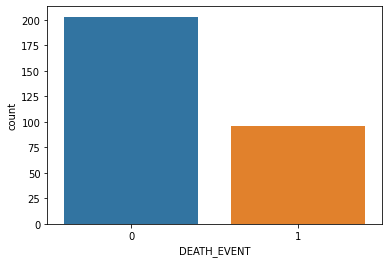

In [17]:
# Visualize the values
sns.countplot(data["DEATH_EVENT"])

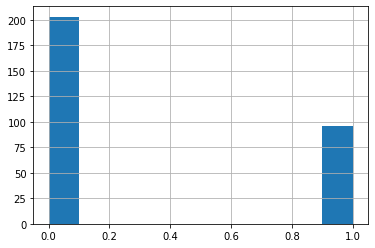

In [18]:
data['DEATH_EVENT'].hist()


In [19]:
#histogram if regression
#sns.distplot(data['']);

*Findings of Univariate Analysis*

The number of unique values in RainTomorrow variable is 2.

The two unique values are No and Yes.

Out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

The univariate plot confirms our findings that –

The No variable have 110316 entries, and

The Yes variable have 31877 entries.

**Bivariate Analysis**

**Explore categorical variables**

In [20]:
print('There are {} categorical variables\n'.format(len(cat_features)))
print('The categorical variables are :', cat_features)

There are 0 categorical variables

The categorical variables are : []


In [21]:
# view the categorical variables

data[cat_features].head()

""
0
1
2
3
4


**Checking cardinality of each Categorical Feature**

In [22]:
# check for cardinality in categorical variables

for i  in cat_features:
  count = len(data[i].unique())
  print("The Cardinality of column {} is : {} ".format(i,count))

**Missing values in Categorical Variables**

In [23]:
# check missing values in categorical variables
data[cat_features].isnull().sum()

Series([], dtype: float64)

**Explore Categorical Variables one by one**

In [104]:
#data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [105]:
# .unique and .value_counts

# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(DATA.ATTRIBUTE, drop_first=True).head()

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

NameError: ignored

**Explore Numerical Variables**

In [106]:
print('There are {} numerical variables\n'.format(len(num_features)))

print('The numerical variables are :', num_features)

There are 13 numerical variables

The numerical variables are : ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


**Missing values in Numerical Variables**

In [107]:
# Check missing values in Numerical variables
data[num_features].isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Outliers in Numerical Variables**

ValueError: ignored

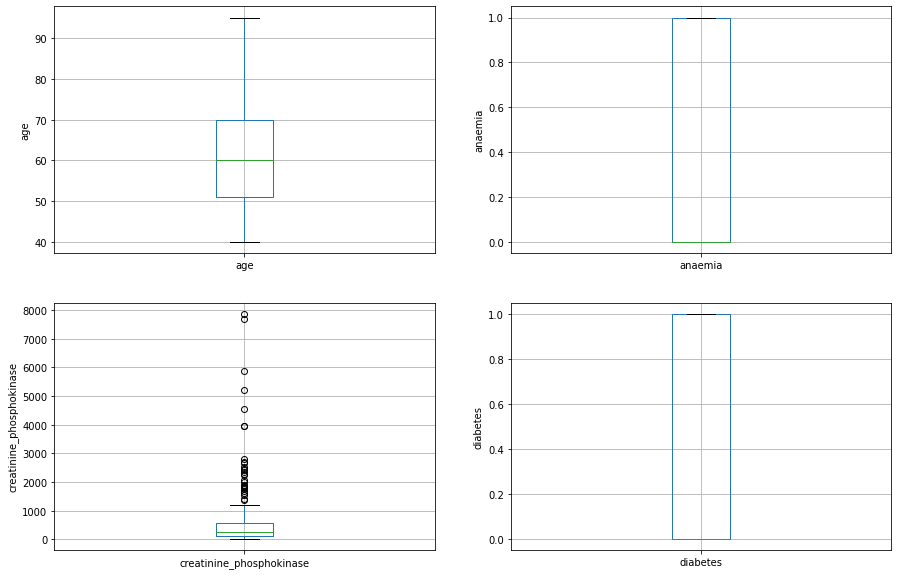

In [108]:
# Draw boxplots to visualize outliers

plt.figure(figsize=(15,10))
c = 1
for i in num_features:
  plt.subplot(2, 2, c)
  fig = data.boxplot(column=i)
  fig.set_title('')
  fig.set_ylabel(i)
  c += 1

ValueError: ignored

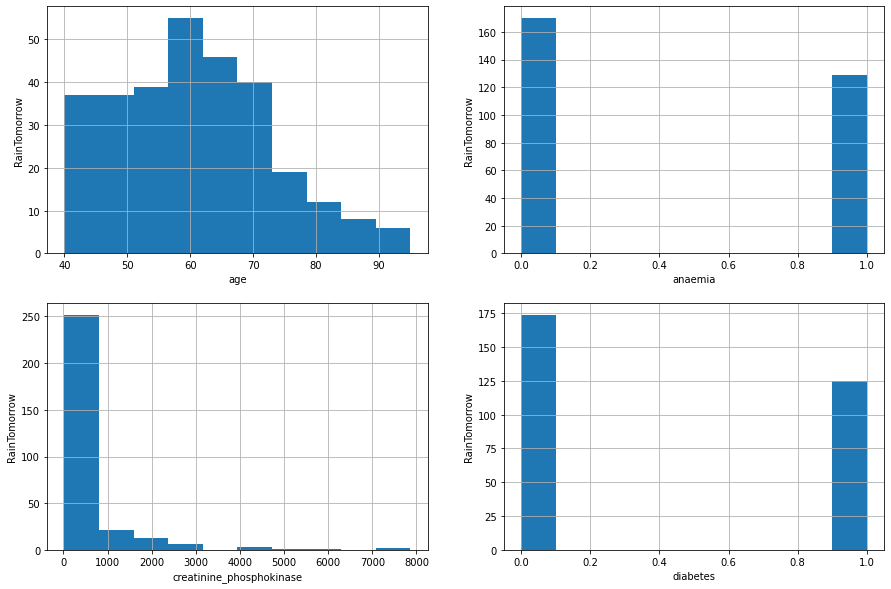

In [109]:
# Plot histogram to check distribution

plt.figure(figsize=(15,10))

c = 1
for i in num_features:
  plt.subplot(2, 2, c)
  fig = data[i].hist(bins=10)
  fig.set_xlabel(i)
  fig.set_ylabel('RainTomorrow')
  c += 1

**Remove Outliers**

In [24]:
features_with_outliers = num_features
for feature in features_with_outliers:
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  data.loc[data[feature]<lower_limit, feature] = lower_limit
  data.loc[data[feature]>upper_limit, feature] = upper_limit

**Multivariate Analysis**

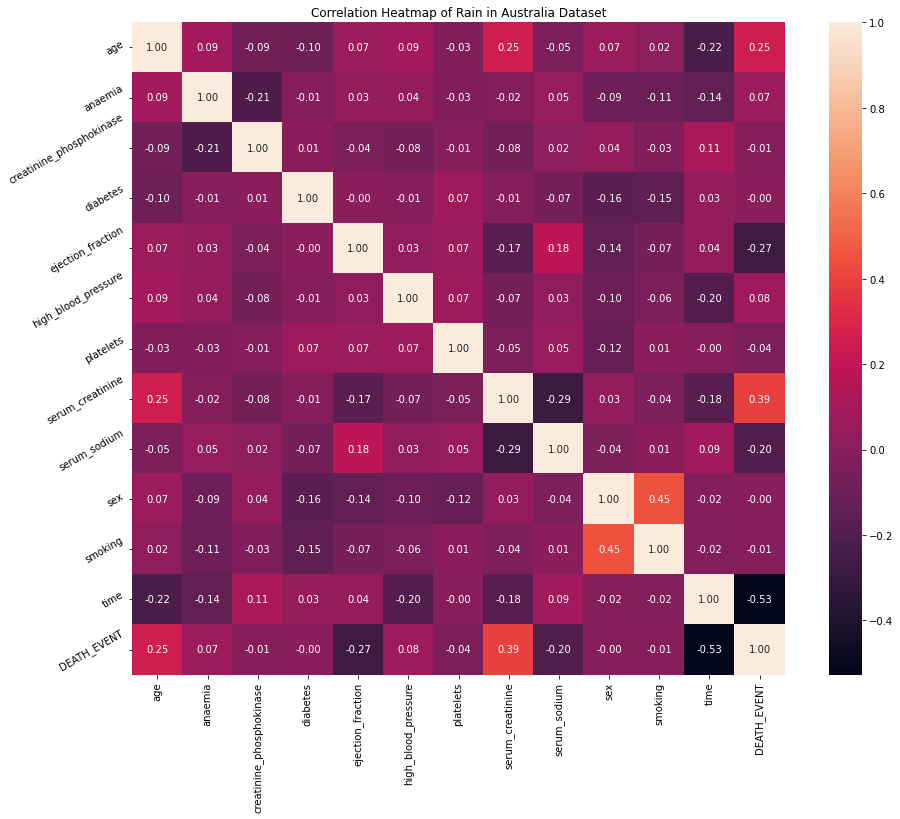

In [25]:
#Heat Map

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(data.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Feature Engineering**

In [ ]:
# Handling Missing Values of Numerical Variables
num_features_with_null = [feature for feature in num_features if data[feature].isnull().sum()]
for feature in num_features_with_null:
  data[feature] = data[feature].fillna(data[feature].mean())

# Handling Missing Values of Categorical Variables

cat_features_with_null = [feature for feature in cat_features if data[feature].isnull().sum()]  # list will return with categorical features
for feature in cat_features_with_null:
  data[feature] = data[feature].fillna(data[feature].mode()[0])     #each cat_feature is filled by most repeated value 


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = data.columns
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=[cols])

In [ ]:

#sns.pairplot(data[cols], kind='scatter', diag_kind='hist', palette='Rainbow')
#plt.show()

Resampling data

**Declare Feature Vector and Target Variable**

In [26]:
X = data.drop(['DEATH_EVENT'], axis=1)

y = data['DEATH_EVENT']

**Split Data into Training and Testing**

In [27]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((239, 12), (60, 12))

**Model Training**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def run_models(X_train, y_train, X_test, y_test):   
  result = {}
  models = [
            ('LogReg', LogisticRegression()), 
            ('RF', RandomForestClassifier()),
            ('KNN', KNeighborsClassifier()),
            ('SVM', SVC()), 
            ('GNB', GaussianNB()),
            ('XGB', XGBClassifier())
          ]
  results = []
  scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
  target_names = []
  for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(confusion_matrix(y_test, clf.predict(X_test)))
    print(classification_report(y_test, y_pred, target_names=target_names))
    result[name] = round(clf.score(X_train, y_train) * 100, 2)
  return result
#models = pd.DataFrame({
#    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
 #             'Random Forest', 'Naive Bayes', 'Perceptron', 
#              'Stochastic Gradient Decent', 'Linear SVC', 
#              'Decision Tree'],
 #   'Score': [acc_svc, acc_knn, acc_log, 
#              acc_random_forest, acc_gaussian, acc_perceptron, 
 #             acc_sgd, acc_linear_svc, acc_decision_tree]})
#models.sort_values(by='Score', ascending=False)

Resampling Data

In [30]:
from sklearn.utils import resample

safe = data[data["DEATH_EVENT"] == 0]
unsafe = data[data["DEATH_EVENT"] == 1]

In [31]:
upsampled = resample(unsafe,
                          replace=True, 
                          n_samples=len(safe), 
                          random_state=33)

In [32]:
upsampled = pd.concat([safe, upsampled])

# check new class counts
upsampled["DEATH_EVENT"].value_counts()

1.0    203
0.0    203
Name: DEATH_EVENT, dtype: int64

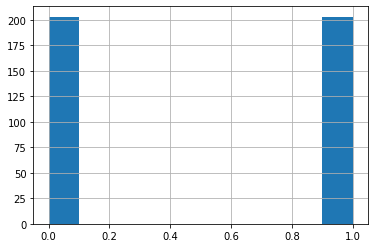

In [33]:
upsampled['DEATH_EVENT'].hist()

In [34]:
X = upsampled.drop(["DEATH_EVENT"],axis=1)
y = upsampled["DEATH_EVENT"]

In [35]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [36]:
print(f'X Training Shape:',X_train.shape)
print(f'y Training Shape:',y_train.shape)
print('***************************')
print(f'X Testing Shape y:',X_test.shape)
print(f'y Testing Shape y:',y_test.shape)

X Training Shape: (324, 12)
y Training Shape: (324,)
***************************
X Testing Shape y: (82, 12)
y Testing Shape y: (82,)


In [37]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [1]:
import sklearn
import autosklearn.classification as classifier

In [38]:
clf = classifier.AutoSklearnClassifier(time_left_for_this_task=300, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)
# Init training
clf.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_size=1,
                      initial_configurations_via_metalearning=0,
                      per_run_time_limit=9, time_left_for_this_task=300)

In [39]:
clf.score(X_train, y_train)

0.9876543209876543

In [40]:
clf.score(X_test, y_test)

0.8902439024390244

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)

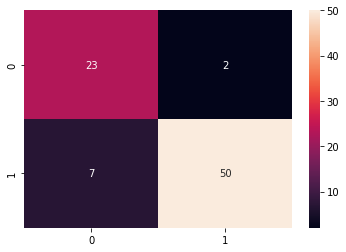

In [42]:

conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [43]:
#Performance Measures
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [44]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)

In [45]:
print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')

Accuracy    : 0.8902439024390244
Precision   : 0.9615384615384616
Recall      : 0.8771929824561403
F1 score    : 0.9174311926605504


#Hyper Parameter Tuning

In [46]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.945000 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.933667 (0.021053) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.934000 (0.022598) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935333 (0.022618) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.933667 (0.021367) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.934667 (0.023200) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935333 (0.022618) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.936667 (0.020548) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936000 (0.022151) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.937000 (0.022234) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.939000 (0.020224) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.939667 (0.020080) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.938667 (0.022910) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.943667 (0.021053) wi

In [ ]:

#accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
#confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
#classification = metrics.classification_report(Y_test, v.predict(X_test))
#print()
print('============================== {} Model Test Results ==============================')
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()    /*